# CS 109A/AC 209A/STAT 121A Data Science: Airbnb Project
## Milestone #4 - Baseline Model
**Harvard University**  
**Fall 2016**  
**Team**: Stephen Camera-Murray, Himani Garg, and Vijay Thangella  
**TF**: Christine Hwang  
  
**Due Date: ** Monday, November 28th, 2016 at 11:59pm

### Baseline Model

#### Import libraries

In [1]:
# import libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
from sklearn.linear_model import LogisticRegression

# suppress warnings
warnings.filterwarnings ( 'ignore' )
%matplotlib inline

#### Load the cleansed data

We begin by loading the listings dataset we saved after cleansing from milestone #3:  
- cleansed_listings.csv.gz - the New York City Airbnb listing data from January 2015 (cleansed)  
  
**Note** - The baseline model is ignoring seasonality for now. If we can later determine that seasonality plays a large enough part in price prediction, we'll include it in our final model.

In [2]:
# load listings data into a pandas df
listingsDF = pd.read_csv (  './datasets/cleansed_listings.tab.gz', sep = '\t', index_col = 'id', compression = 'gzip' )

# display the first two rows
listingsDF.head ( n = 2 )

,name,neighborhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,months_as_host,months_since_first_review,months_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
1069266,Stay like a real New Yorker!,Midtown East,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,...,9.0,7.0,9.0,9.0,10.0,9.0,1,21,21,1
2061725,Option of 2 Beds w Private Bathroom,Bushwick,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,NaN,...,10.0,10.0,10.0,10.0,9.0,10.0,4,24,11,1


In [3]:
print ( 'The listings dataframe has {0} listings and {1} columns.' ).format ( listingsDF.shape [ 0 ], listingsDF.shape [ 1 ] )

The listings dataframe has 19526 listings and 30 columns.


The cleansed listings dataframe is the main dataset we'll be using for our baseline prediction. It has 19,526 listings and 31 columns. The columns are listed below.

In [4]:
print listingsDF.columns.values

['name' 'neighborhood' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'square_feet' 'price'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'host_listing_count' 'months_as_host'
 'months_since_first_review' 'months_since_last_review']


Keeping in mind that our goal is to provide pricing guidance to new owners who wish to list their property, we've come up with three price groupings based on our data to have a nice balance between the groups **and** user-friendly ranges. As we can see from the distribution below (filtering out the handful of \$1000+ listings to improve the visualization) for one bedroom listings, there's a wide range. We'll create a new target variable to identify each listing for one of three categories:  
- Low: Up to \$125  
- Mid: \$125 - \$250  
- High: Over \$250  
  
**Note**: The distribution is different than in milestone #3. We discovered an error we made on the price column while cleansing the data and have since corrected it. Our price ranges have been updated as well.

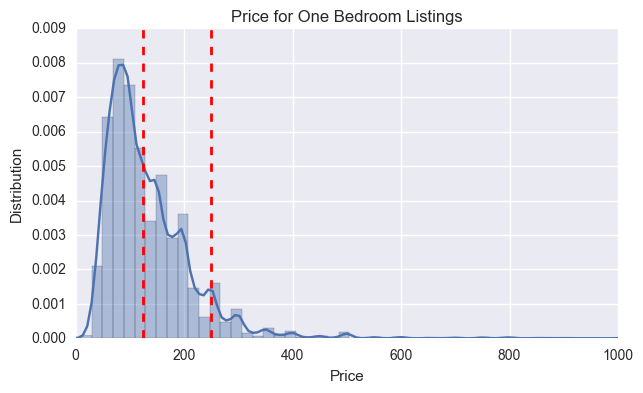

In [5]:
# set up visualization
sns.set ( rc = { "figure.figsize" : ( 7, 4 ) } )

# plot the histogram of prices - filtering out the extreme highs
ax = sns.distplot ( listingsDF [ "price" ] [ listingsDF [ "price" ] < 1000 ] )

# set the labels
ax.set_title  ( "Price for One Bedroom Listings" )
ax.set_xlabel ( "Price" )
ax.set_ylabel ( "Distribution" )

ax.set_xlim ( 0, 1000 )

# set our price grouping cutoffs
plt.axvline ( 125, color = 'r', linestyle = 'dashed', linewidth = 2 )
plt.axvline ( 250, color = 'r', linestyle = 'dashed', linewidth = 2 )

# display the visualization
plt.show()

Now, let's create a price category column and drop the price column.

In [6]:
# create the price_category column based on our ranges
listingsDF [ "price_category" ] = "Low"
listingsDF [ "price_category" ][ ( listingsDF [ "price" ] >= 125 ) & ( listingsDF [ "price" ] <= 300 ) ] = "Mid"
listingsDF [ "price_category" ][ ( listingsDF [ "price" ] >  250 ) ] = "High"

# drop the price column
listingsDF.drop ( [ 'price' ], axis = 1, inplace = True )

# display the first two rows
listingsDF.head ( n = 2 )

,name,neighborhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,months_as_host,months_since_first_review,months_since_last_review,price_category
id,,,,,,,,,,,,,,,,,,,,,
1069266,Stay like a real New Yorker!,Midtown East,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,...,7.0,9.0,9.0,10.0,9.0,1,21,21,1,Mid
2061725,Option of 2 Beds w Private Bathroom,Bushwick,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,NaN,...,10.0,10.0,10.0,9.0,10.0,4,24,11,1,Low


Now let's see what the distribution is among the price categories.

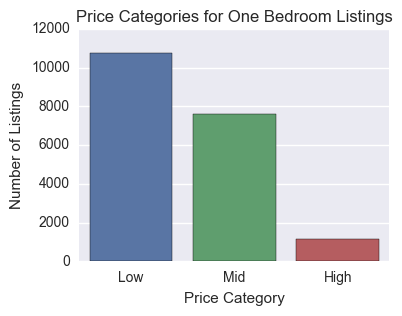

In [7]:
# set up visualization
sns.set ( rc = { "figure.figsize" : ( 4, 3 ) } )
ax = plt.axes()

# create a barplot of the price categories
ax = sns.barplot ( x = listingsDF.price_category.value_counts().index
                 , y = listingsDF.price_category.value_counts() )

# set the labels
ax.set_title  ( "Price Categories for One Bedroom Listings" )
ax.set_xlabel ( "Price Category" )
ax.set_ylabel ( "Number of Listings" )

# display the visualization
plt.show()

We can see from the visualization that we have a reasonable number of listings in each category.  
  
Save the new dataset.

In [8]:
# save the listings dataframe as a tab-delimited, compressed file
listingsDF.to_csv ( './datasets/cleansed_listings_with_target.tab.gz', sep = '\t', index = False, compression = 'gzip' )

Split our dataframe into train and test and separate our predictors from the target.

In [17]:
# split our dataframe into train and test
train, test = train_test_split ( listingsDF, train_size = 0.6 )

# separate x's and y's
x_train = train.drop ( "price_category", axis = 1 )
x_test  = test.drop  ( "price_category", axis = 1 )
y_train = train [ "price_category" ]
y_test  = test  [ "price_category" ]

#### Establishing a baseline model  
  
Before we begin model building, we need to establish a baseline model to compare against our final model. Our goal is to provide pricing guidance to new owners who wish to list their property, we come up with three price groupings based on our data to have a nice balance between the groups and user-friendly ranges.  
  
We'll use the following models for our baselines (note: our baselines are intentionally very simple and don't use logistic regression, LDA, QDA, etc. as outlined in lab 10):
- Random selection
- Low model (choose "Low" category only)
- Mid model (choose "Mid" category only)
- High model (choose "High" category only)  

These models will be applied to our testing dataset. But first, let's look at the proportion of listings in the test set that fall in to each price category.

In [18]:
# fetch the number of listings in the test dataset
num_listings = y_test.shape [ 0 ]

# print the price category percentages
print ( 'Percentage of listings with the price category Low: {0:.1f}%, Mid: {1:.1f}%, High: {2:.1f}%' ).format ( 100.0 * y_test.value_counts() [ 0 ] / num_listings, 100.0 * y_test.value_counts() [ 1 ] / num_listings, 100.0 * y_test.value_counts() [ 2 ] / num_listings )

Percentage of listings with the price category Low: 54.5%, Mid: 39.5%, High: 6.0%


Create a function to score our models.

In [11]:
# function to compute the accuracy of a given model
score = lambda model, x_test, y_test: pd.Series ( [ model.score ( x_test, y_test ), 
                                                    model.score ( x_test [ y_test == "Low" ],  y_test [ y_test == "Low" ]  ),
                                                    model.score ( x_test [ y_test == "Mid" ],  y_test [ y_test == "Mid" ]  ),
                                                    model.score ( x_test [ y_test == "High" ], y_test [ y_test == "High" ] ),
                                                    f1_score    ( y_test, model.predict ( x_test ), average = "weighted" ) ],
                                                    index = [ 'Overall Accuracy', 'Accuracy on Low Category', 'Accuracy on Mid Category', 'Accuracy on High Category', 'F1 Score'  ])

Create functions for our baseline models.

In [12]:
# model predicting random values
class random_model ( object ):
    def predict ( self, x ):
        cats = [ "Low", "Mid", "High" ]
        return np.random.choice ( cats, len ( x ), replace = True )

    def score ( self, x, y ):
        y_pred = self.predict ( x )
        return ( y_pred == y ).sum() * 1. / len ( y )

# model predicting Low
class low_model ( object ):
    def predict ( self, x ):
        return np.array ( [ "Low" ] * len ( x ) )
    def score ( self, x, y ):
        y_pred = self.predict ( x )
        return ( y_pred == y ).sum() * 1. / len ( y )

# model predicting Mid
class mid_model ( object ):
    def predict ( self, x ):
        return np.array ( [ "Mid" ] * len ( x ) )
    def score ( self, x, y ):
        y_pred = self.predict ( x )
        return ( y_pred == y ).sum() * 1. / len ( y )

# model predicting High
class high_model ( object ):
    def predict ( self, x ):
        return np.array ( [ "High" ] * len ( x ) )
    def score ( self, x, y ):
        y_pred = self.predict ( x )
        return ( y_pred == y ).sum() * 1. / len ( y )

Build our models and score.

In [13]:
# build and score our baseline models
random              = random_model()
random_model_scores = score ( random, x_test, y_test )

low                 = low_model()
low_model_scores    = score ( low, x_test, y_test )

mid                 = mid_model()
mid_model_scores    = score ( mid, x_test, y_test )

high                = high_model()
high_model_scores   = score ( high, x_test, y_test )

# print scores
scoreDF = pd.DataFrame ( { 'Random Model'              : random_model_scores,
                           'Low Model'                 : low_model_scores,
                           'Mid Model'                 : mid_model_scores,
                           'High Model'                : high_model_scores } )
scoreDF

,High Model,Low Model,Mid Model,Random Model
Overall Accuracy,0.059531,0.556523,0.383946,0.329535
Accuracy on Low Category,0.000000,1.000000,0.000000,0.328042
Accuracy on Mid Category,0.000000,0.000000,1.000000,0.327109
Accuracy on High Category,1.000000,0.000000,0.000000,0.335484
F1 Score,0.006690,0.397961,0.213035,0.372206


#### Summary

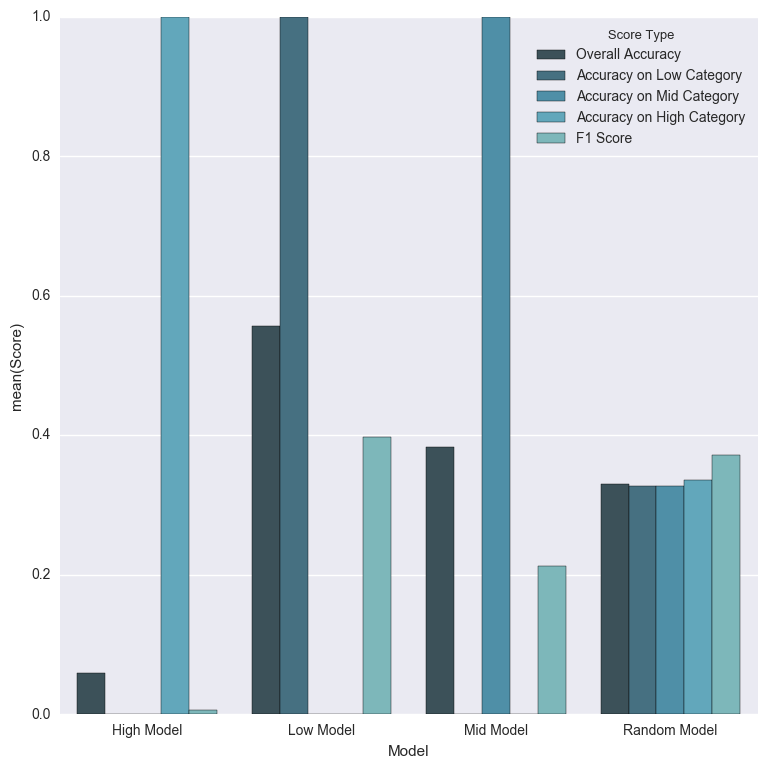

In [14]:
# set up visualization
sns.set ( rc = { "figure.figsize" : ( 9, 9 ) } )
sns.set_palette ( palette = "GnBu_d" )
ax = plt.axes()

# create a barplot of the price categories
#ax = sns.barplot ( x = list(scoreDF.columns.values), y = scoreDF.values, hue = scoreDF.index.value_counts().index )
q = pd.concat ( [ pd.DataFrame ( { "Score Type": np.tile ( scoreDF.index.values, 4 ) } ), pd.melt ( scoreDF, var_name = "Model", value_name = "Score" ) ], axis = 1 )
ax = sns.barplot ( x = "Model", y = "Score", hue = "Score Type", data = q )

As mentioned earlier, we chose very simple baselines based on what was done in lab 10 and will pursue more advanced models later in the project. Our baselines perform as expected with the overall accuracy of each price category following the distribution of the test dataset and the random model with very similar accuracies for all score types.